In [2]:
from glob import glob
import numpy as np

In [3]:
from lightkurve import KeplerTargetPixelFile
from astropy.coordinates import SkyCoord

In [4]:
#fnames = np.sort(glob('data/*.fits'))
#tpf = KeplerTargetPixelFile.from_fits_images(images=fnames,
  #                                           position=SkyCoord(257.13700, 24.48958, unit='deg'),
  ##                                           size=(9,9),
         #                                    target_id='MyCutOut')

/anaconda3/lib/python3.6/site-packages/lightkurve/search.py:181: LightkurveWarning: Warning: 2 files available to download. Only the first file has been downloaded. Please use `download_all()` or specify additional criteria (e.g. quarter, campaign, or sector) to limit your search.
  LightkurveWarning)


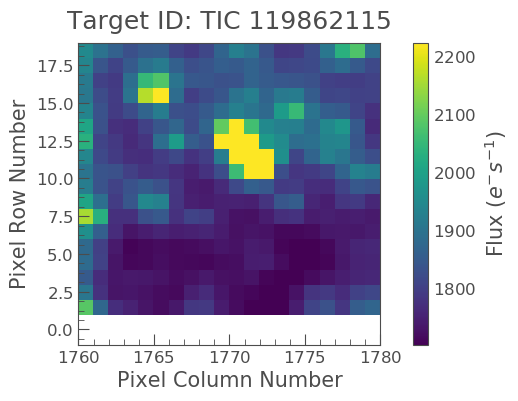

In [5]:
import lightkurve as lk

tpf = lk.search_tesscut('TIC 119862115').download(cutout_size=20)

tpf
tpf.plot()

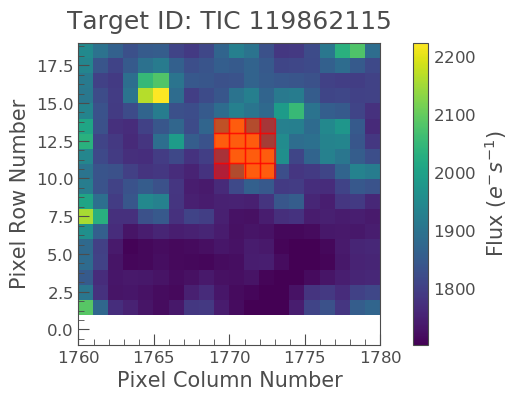

In [13]:
import numpy as np
aper = np.zeros(tpf.shape[1:], dtype=np.int)
aper[11:15, 9:13] = 1
tpf.plot(aperture_mask=aper, mask_color='red');

(0.99, 1.01)

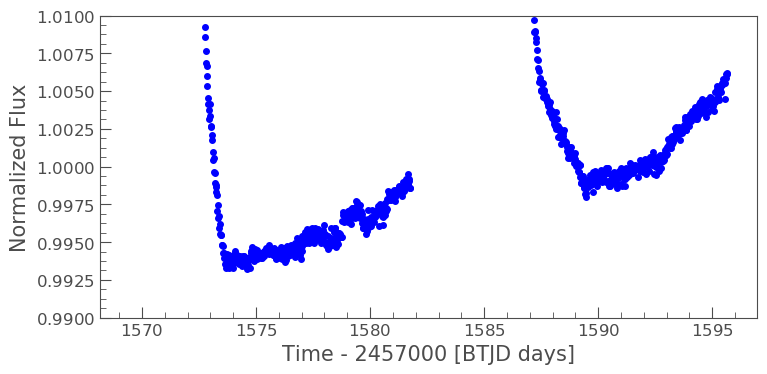

In [14]:
import matplotlib.pyplot as plt

# Build the NEW aperture, and the light curve
user_lc = tpf.to_lightcurve(aperture_mask=aper.astype(bool))
# Clean the light curve
user_lc = user_lc.remove_nans().remove_outliers()
user_lc.plot(marker='o',linestyle='None',markersize=4,color='blue')
plt.ylim(0.99,1.01)


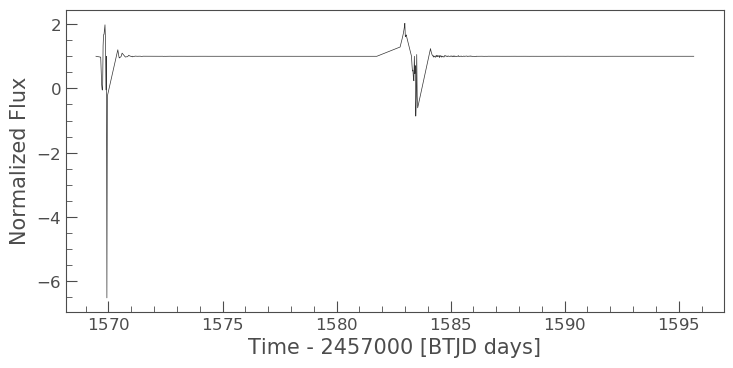

In [17]:
#SFF Corrector
corrector = lk.correctors.SFFCorrector(user_lc)
new_lc_sff = corrector.correct(user_lc.centroid_col,user_lc.centroid_row)

new_lc_sff.plot()

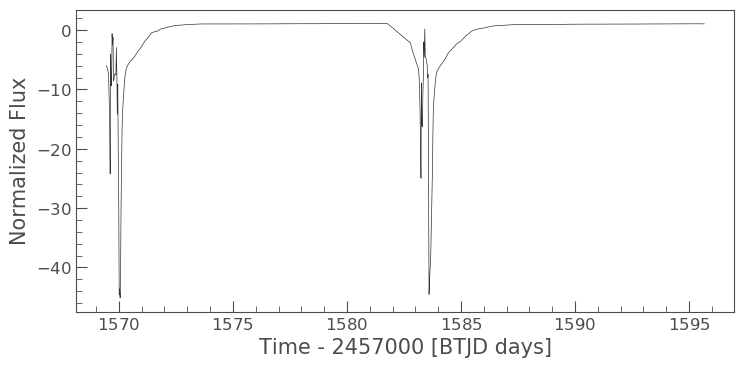

In [18]:
#PLD Corrector
corrector = lk.PLDCorrector(tpf) # doctest: +SKIP
new_lc_pld = corrector.correct() # doctest: +SKIP

new_lc_pld.plot()